In [ ]:
import pandas as pd


In [ ]:

data = pd.read_csv(#path to file)
data.head()


,Naturalness,Taste,Price,Safety,Convenience,Nutrition,Novelty,Origin,Fairness,Appearance,...,CurrentlyOnFoodStamps,State,Education,Approximate / annual household income before taxes in 2012,"Hispanic, Latino, or Spanish origin?",Race,PoliticalInclination,PoliticalParty,LocationLatitude,LocationLongitude
0,1.0,4.0,0.0,4.0,0.0,3.0,NaN,NaN,1.0,1.0,...,1.0,33.0,3.0,2.0,1.0,2.0,1.0,1.0,40.859604,-73.931396
1,1.0,3.0,0.0,2.0,0.0,4.0,0.0,3.0,NaN,NaN,...,2.0,36.0,4.0,2.0,1.0,2.0,4.0,1.0,41.045502,-81.526604
2,1.0,4.0,0.0,4.0,1.0,1.0,0.0,1.0,NaN,NaN,...,2.0,6.0,3.0,4.0,1.0,2.0,4.0,1.0,38.746597,-104.710297
3,0.0,2.0,NaN,NaN,1.0,4.0,0.0,1.0,1.0,3.0,...,2.0,23.0,3.0,1.0,2.0,1.0,6.0,4.0,41.893402,-84.065903
4,0.0,1.0,NaN,NaN,0.0,4.0,NaN,NaN,1.0,3.0,...,2.0,33.0,6.0,5.0,3.0,1.0,1.0,1.0,40.694397,-73.990601


In [ ]:
len(data.loc[0,])

82

In [ ]:
data.columns

Index(['Naturalness', 'Taste', 'Price', 'Safety', 'Convenience', 'Nutrition',
       'Novelty', 'Origin', 'Fairness', 'Appearance', 'Environmental Impact',
       'Animal Welfare', 'Naturalness.1', 'Taste.1', 'Price.1', 'Safety.1',
       'Convenience.1', 'Nutrition.1', 'Novelty.1', 'Origin.1', 'Fairness.1',
       'Appearance.1', 'Environmental Impact.1', 'Animal Welfare.1',
       'Weekly GroceryExpenditure', 'Weekly Eating Out Expenditure',
       'Finding affordable foods that fit my budget',
       'Avoiding foods that contain pesticides, added hormones & antibiotics',
       'Finding convenient, quick-to-make alternatives',
       'Finding foods my children will eat', 'Losing weight',
       'Finding time to cook at home',
       'Avoiding certain nutrients or ingredients (i.e. sodium, carbohydrates, trans fats, etc.)',
       'Priceset1', 'Priceset2', 'Priceset3', 'Priceset4', 'Priceset5',
       'Priceset6', 'Priceset7', 'Priceset8', 'Priceset9', 'Priceset10',
       'Priceset1

Removing irrelevant columns and columns like Race, gender and state due to non uniform representation.

In [ ]:
removedcols=data.drop(['State','Naturalness', 'Taste', 'Price', 'Safety', 'Convenience', 'Nutrition',
       'Novelty', 'Origin', 'Fairness', 'Appearance', 'Environmental Impact','FarmingExperience',
       'Animal Welfare', 'Naturalness.1', 'Taste.1', 'Price.1', 'Safety.1',
       'Convenience.1', 'Nutrition.1', 'Novelty.1', 'Origin.1', 'Fairness.1','ReceivedFoodStamps','PoliticalParty','Hispanic, Latino, or Spanish origin?',
       'Appearance.1', 'Environmental Impact.1', 'Animal Welfare.1','LocationLatitude', 'LocationLongitude','Weight', 'Height','PoliticalInclination','Are you a vegetarian or a vegan?',
       'Primaryshopper','Race','Gender'],axis=1)

Find percentage missing values

In [ ]:
n=removedcols.isnull().sum()/len(data)*100

Remove columns with number of missing values greater than 20 percent of the column

In [ ]:
variables=removedcols.columns
variable=[]
for i in range(len(n)):
  if(n[i]<=20):
    variable.append(variables[i])

In [ ]:
removedmissing=removedcols[variable]

Impute missing values using K nearest neighbours algorithm for the remaining columns

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(removedmissing)
# transform the dataset
df_filled = imputer.transform(removedmissing)

In [ ]:
copy = pd.DataFrame(data=df_filled, columns=removedmissing.columns)
copy

,Weekly GroceryExpenditure,Weekly Eating Out Expenditure,Finding affordable foods that fit my budget,"Avoiding foods that contain pesticides, added hormones & antibiotics","Finding convenient, quick-to-make alternatives",Finding foods my children will eat,Losing weight,Finding time to cook at home,"Avoiding certain nutrients or ingredients (i.e. sodium, carbohydrates, trans fats, etc.)",CurrentlyFarm,Age,MaritalStatus,NumberInHousehold,Children<12,CurrentlyOnFoodStamps,Education,Approximate / annual household income before taxes in 2012
0,4.0,2.0,6.0,2.0,5.0,7.0,1.0,4.0,3.0,2.0,5.0,1.0,1.0,2.0,1.0,3.0,2.0
1,4.0,3.0,5.0,6.0,3.0,4.0,7.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0
2,6.0,4.0,7.0,1.0,2.0,4.0,5.0,3.0,6.0,2.0,5.0,2.0,4.0,2.0,2.0,3.0,4.0
3,4.0,1.0,3.0,4.0,7.0,6.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0
4,5.0,3.0,5.0,6.0,4.0,7.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,6.0,5.0
5,5.0,6.0,2.0,1.0,7.0,5.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,1.0,2.0,5.0,6.0
6,4.0,4.0,4.0,2.0,5.0,7.0,1.0,3.0,6.0,2.0,4.0,4.0,1.0,2.0,2.0,5.0,5.0
7,8.0,1.0,5.0,6.0,2.0,3.0,4.0,1.0,7.0,2.0,4.0,2.0,4.0,1.0,2.0,5.0,8.0
8,3.0,3.0,1.0,3.0,6.0,7.0,2.0,5.0,4.0,2.0,5.0,4.0,1.0,2.0,1.0,4.0,1.0
9,7.0,6.0,4.0,5.0,6.0,7.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0


In [ ]:
# import numpy as np
# corr_matrix = copy.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
# removedhighcorr=copy.drop(copy[to_drop], axis=1)
# removedhighcorr

Scale all values before sending it into feature selection


In [ ]:
removedhighcorr=copy
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_df=scaler.fit_transform(removedhighcorr)

Use Principal component analysis to identify the important features and created a reduced set of components that can represent the data. First we need to find out the number of components required.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_df)


PCA()

Find number of components that maintains 80 percent of the variance

In [ ]:
summ=pca.explained_variance_ratio_.cumsum()
count=0
for ele in summ:
  count+=1
  if(ele>0.8):
    
    break
print(count)

10


Text(0, 0.5, 'Cumulative Explained Variance')

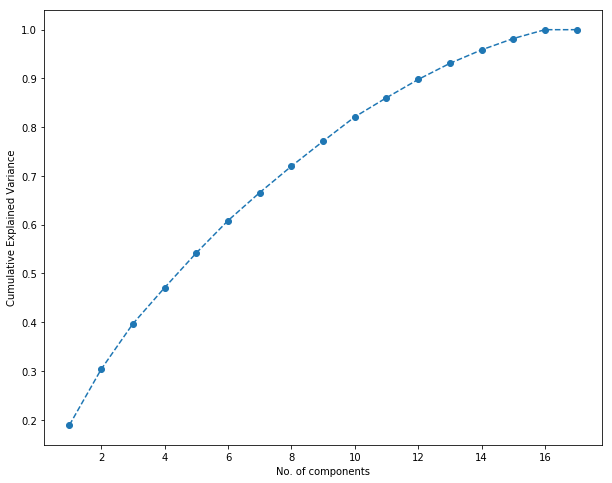

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance')

Create 10 components and transform dataset

In [ ]:
pca=PCA(n_components=10)

In [ ]:
pca.fit(std_df)

PCA(n_components=10)

In [ ]:
scores_pca=pca.transform(std_df)

Here we use silhouette scores to identify optimum number of clusters for K-Means clustering. However, the optimal clusters creates disjoint sets which does not represent consumers in real life as they have a lot of features in common. This is also a result of inadequate data. So we choose number of clusters greater than optimal number of clusters to ensure overlap of some features. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(scores_pca)
  labels = kmeans.labels_
  sil.append(silhouette_score(scores_pca, labels, metric = 'euclidean'))
sil

[0.18610823418120528,
 0.11243290580966099,
 0.1253620316017589,
 0.12179356041812003,
 0.11484495739479894,
 0.11042472224798355,
 0.1069971584494389,
 0.10675984985803148,
 0.1034747827307377,
 0.10090891095119796,
 0.10294074991845527,
 0.10447996578794849,
 0.10476323571829144,
 0.1008011817593136,
 0.1001641022443022,
 0.10317487244296766,
 0.10176377201473243,
 0.09852935128297302,
 0.10028782029485037]

Text(0, 0.5, 'Silhouette Score')

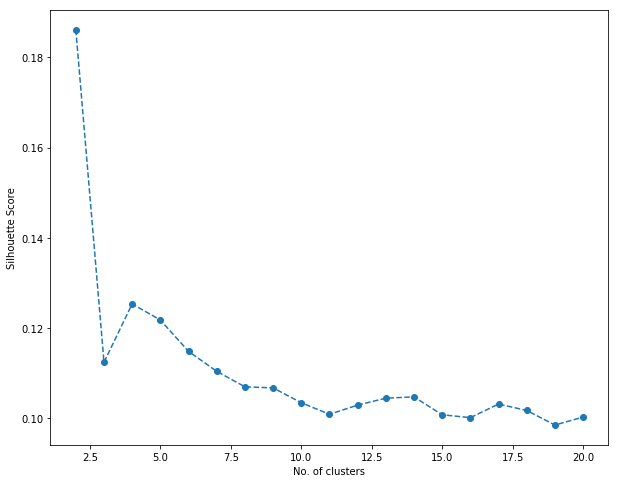

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21),sil,marker='o',linestyle='--')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')


After looking at 5,6,7,8,9,10 clusters, we have chosen 8

In [ ]:
kmeans_pca=KMeans(n_clusters=8,init='k-means++',random_state=42)

In [ ]:
kmeans_pca.fit(scores_pca)

KMeans(random_state=42)

Append the cluster labels to the dataset and also append race and state columns so we can understand demographics of these clusters.

In [ ]:
df_kmeans=pd.concat([pd.DataFrame(copy),pd.DataFrame(scores_pca)],axis=1)
df_kmeans['Cluster']=kmeans_pca.labels_
df_kmeans['Race']=data['Race']
df_kmeans['State']=data['State']

In [ ]:
df_kmeans

,Weekly GroceryExpenditure,Weekly Eating Out Expenditure,Finding affordable foods that fit my budget,"Avoiding foods that contain pesticides, added hormones & antibiotics","Finding convenient, quick-to-make alternatives",Finding foods my children will eat,Losing weight,Finding time to cook at home,"Avoiding certain nutrients or ingredients (i.e. sodium, carbohydrates, trans fats, etc.)",CurrentlyFarm,...,3,4,5,6,7,8,9,Cluster,Race,State
0,4.0,2.0,6.0,2.0,5.0,7.0,1.0,4.0,3.0,2.0,...,1.488547,1.079999,-1.455526,-0.815469,1.427251,0.842603,-0.529502,4,2.0,33.0
1,4.0,3.0,5.0,6.0,3.0,4.0,7.0,1.0,2.0,2.0,...,-0.611502,-0.765562,-1.574641,-1.138887,0.999680,-0.882013,1.344233,7,2.0,36.0
2,6.0,4.0,7.0,1.0,2.0,4.0,5.0,3.0,6.0,2.0,...,-1.190405,-0.632794,-0.020480,-0.559416,1.831059,0.317082,-2.122688,3,2.0,6.0
3,4.0,1.0,3.0,4.0,7.0,6.0,1.0,5.0,2.0,2.0,...,2.121632,-0.638976,-0.042349,-1.008698,-0.117550,-0.002823,0.401657,4,1.0,23.0
4,5.0,3.0,5.0,6.0,4.0,7.0,2.0,3.0,1.0,2.0,...,1.508805,-0.120995,-1.082729,-0.114806,-0.023937,-0.843189,1.419828,0,1.0,33.0
5,5.0,6.0,2.0,1.0,7.0,5.0,3.0,6.0,4.0,2.0,...,0.673587,-0.713897,-0.017122,-0.132922,-1.666672,0.096358,-0.906727,3,8.0,21.0
6,4.0,4.0,4.0,2.0,5.0,7.0,1.0,3.0,6.0,2.0,...,0.247202,1.293426,0.649039,-1.333529,-0.600317,0.597568,-1.713263,0,1.0,10.0
7,8.0,1.0,5.0,6.0,2.0,3.0,4.0,1.0,7.0,2.0,...,-0.557782,-0.209527,1.373361,-0.546075,0.250358,-0.698409,-0.641096,3,2.0,39.0
8,3.0,3.0,1.0,3.0,6.0,7.0,2.0,5.0,4.0,2.0,...,0.325173,1.877280,0.770104,-0.504101,-0.687599,0.965749,-0.043586,1,2.0,36.0
9,7.0,6.0,4.0,5.0,6.0,7.0,1.0,2.0,3.0,2.0,...,1.467190,0.049581,-0.376783,-0.918831,-0.450320,1.171712,0.834547,0,9.0,5.0


Number of observations in each cluster

In [ ]:
df_kmeans['Cluster'].value_counts()

0    795
4    761
7    710
3    705
6    705
1    612
2    590
5    229
Name: Cluster, dtype: int64

In [ ]:
gb=df_kmeans.groupby('Cluster').describe()

In [ ]:
gb.iloc[:,17]

Cluster
0    4.895597
1    2.529412
2    2.710169
3    4.507801
4    2.965418
5    3.969432
6    2.614184
7    2.546479
Name: (Finding affordable foods that fit my budget, mean), dtype: float64

Mean for each cluster for each feature

In [ ]:
for i in range(1,len(gb.iloc[1,:])):
    if(i-1)%8==0:
        print(gb.iloc[:,i])

Cluster
0    6.368553
1    3.916667
2    5.454237
3    7.076596
4    4.418369
5    5.655022
6    5.072340
7    4.440845
Name: (Weekly GroceryExpenditure, mean), dtype: float64
Cluster
0    4.489308
1    1.805556
2    2.913559
3    5.442553
4    2.259355
5    5.458515
6    2.453901
7    2.681690
Name: (Weekly Eating Out Expenditure, mean), dtype: float64
Cluster
0    4.895597
1    2.529412
2    2.710169
3    4.507801
4    2.965418
5    3.969432
6    2.614184
7    2.546479
Name: (Finding affordable foods that fit my budget, mean), dtype: float64
Cluster
0    3.535849
1    3.727124
2    4.435593
3    4.002837
4    4.601941
5    3.829694
6    2.069504
7    4.887324
Name: (Avoiding foods that contain pesticides, added hormones & antibiotics, mean), dtype: float64
Cluster
0    3.942138
1    3.802288
2    4.752542
3    3.846809
4    4.004110
5    4.165939
6    4.224113
7    2.697183
Name: (Finding convenient, quick-to-make alternatives, mean), dtype: float64
Cluster
0    6.319497
1    6.08006

In [ ]:
pd.DataFrame.to_csv(df_kmeans,"output.csv")

{'file_name': 'output.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'test1-donotdelete-pr-bou4jmefww7m5l',
 'asset_id': 'b7b3b8d7-dcc1-49da-aca2-b56a41c574b0'}